In [33]:
import pandas as pd
import numpy as np

# Cargar dataset limpio
df = pd.read_csv("TelecomX_limpio.csv")

df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [34]:
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly',
       'Charges_Total'],
      dtype='object')

In [2]:
# Eliminar identificador
if "customerID" in df.columns:
    df.drop("customerID", axis=1, inplace=True)

# Convertir variable objetivo a numérica si es necesario
if df["Churn"].dtype == "object":
    df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# Convertir Charges_Total a numérico, manejando posibles errores
df["Charges_Total"] = pd.to_numeric(df["Charges_Total"], errors="coerce")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   float64
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   object 


In [30]:
df.head()


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0.0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0.0,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,1.0,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,1.0,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,1.0,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [35]:
df.isnull().sum()

,0
customerID,0
Churn,224
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


Churn
0.0    0.73463
1.0    0.26537
Name: proportion, dtype: float64


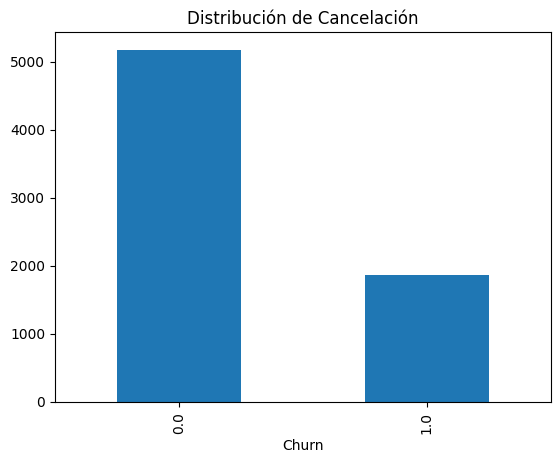

In [3]:
import matplotlib.pyplot as plt

print(df["Churn"].value_counts(normalize=True))

df["Churn"].value_counts().plot(kind="bar")
plt.title("Distribución de Cancelación")
plt.show()

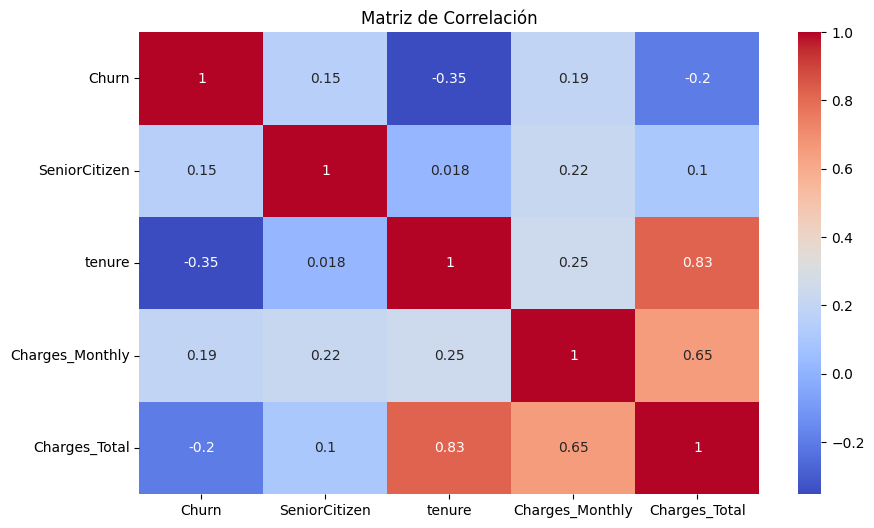

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Seleccionar solo columnas numéricas para la matriz de correlación
df_numeric = df.select_dtypes(include=np.number)

plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

In [5]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [6]:
categorical_cols = X.select_dtypes(include=["object"]).columns
numeric_cols = X.select_dtypes(exclude=["object"]).columns

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline as SklearnPipeline # Avoid name conflict with colab pipeline

# Create a numeric transformer pipeline
numeric_transformer = SklearnPipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_cols)
    ]
)

In [8]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Filter out rows where 'y' (Churn) is NaN
# Assuming X and y are pandas DataFrames/Series and share the same index
non_nan_indices = y.dropna().index
X_filtered = X.loc[non_nan_indices]
y_filtered = y.loc[non_nan_indices]

X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y_filtered,
    test_size=0.3,
    random_state=42,
    stratify=y_filtered
)

*

In [9]:
X_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 
 17  

In [10]:
y_filtered.info()

<class 'pandas.core.series.Series'>
Index: 7043 entries, 0 to 7266
Series name: Churn
Non-Null Count  Dtype  
--------------  -----  
7043 non-null   float64
dtypes: float64(1)
memory usage: 110.0 KB


*

MODELO 1: Logistic Regression

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipeline_log = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(max_iter=1000, random_state=42))
])

pipeline_log.fit(X_train, y_train)

y_pred_log = pipeline_log.predict(X_test)
y_proba_log = pipeline_log.predict_proba(X_test)[:,1]

MODELO 2: Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

pipeline_rf = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(random_state=42))
])

pipeline_rf.fit(X_train, y_train)

y_pred_rf = pipeline_rf.predict(X_test)
y_proba_rf = pipeline_rf.predict_proba(X_test)[:,1]


SMOTE (Balanceo)

In [13]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE solo en entrenamiento
X_train_processed = preprocessor.fit_transform(X_train)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_processed, y_train)

print("Antes:", y_train.value_counts())
print("Después:", y_train_smote.value_counts())

Antes: Churn
0.0    3622
1.0    1308
Name: count, dtype: int64
Después: Churn
0.0    3622
1.0    3622
Name: count, dtype: int64


Logistic + SMOTE

In [14]:
model_log_smote = LogisticRegression(max_iter=1000, random_state=42)
model_log_smote.fit(X_train_smote, y_train_smote)

X_test_processed = preprocessor.transform(X_test)

y_pred_log_smote = model_log_smote.predict(X_test_processed)
y_proba_log_smote = model_log_smote.predict_proba(X_test_processed)[:,1]

Evaluación de Modelos

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluar(nombre, y_test, y_pred, y_proba):
    return {
        "Modelo": nombre,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba)
    }

resultados = []

resultados.append(evaluar("Logistic", y_test, y_pred_log, y_proba_log))
resultados.append(evaluar("Random Forest", y_test, y_pred_rf, y_proba_rf))
resultados.append(evaluar("Logistic + SMOTE", y_test, y_pred_log_smote, y_proba_log_smote))

df_resultados = pd.DataFrame(resultados)
df_resultados.sort_values("ROC-AUC", ascending=False)

,Modelo,Accuracy,Precision,Recall,F1,ROC-AUC
0,Logistic,0.797444,0.638831,0.545455,0.588462,0.840307
2,Logistic + SMOTE,0.746805,0.515012,0.795009,0.625088,0.839838
1,Random Forest,0.786559,0.624434,0.491979,0.550349,0.820105


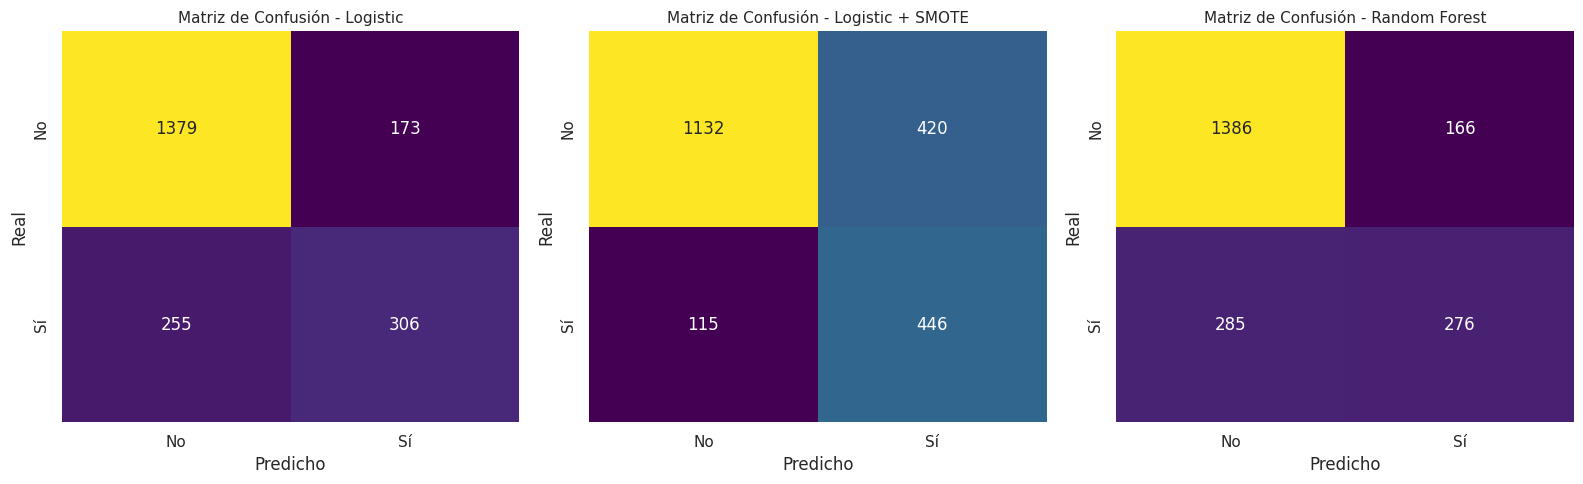

In [38]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Diccionario con tus modelos, predicciones y nombres
modelos = {
    "Logistic": y_pred_log,
    "Logistic + SMOTE": y_pred_log_smote,
    "Random Forest": y_pred_rf
}

# Creamos una figura con subplots
fig, axes = plt.subplots(1, len(modelos), figsize=(16, 5))

# Iteramos sobre cada modelo
for ax, (nombre, y_pred) in zip(axes, modelos.items()):
    cm = confusion_matrix(y_test, y_pred)

    # Graficamos la matriz con seaborn para mejor visualización
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=False, ax=ax)

    ax.set_title(f"Matriz de Confusión - {nombre}", fontsize=11)
    ax.set_xlabel("Predicho")
    ax.set_ylabel("Real")
    ax.xaxis.set_ticklabels(["No", "Sí"])
    ax.yaxis.set_ticklabels(["No", "Sí"])

plt.tight_layout()
plt.show()


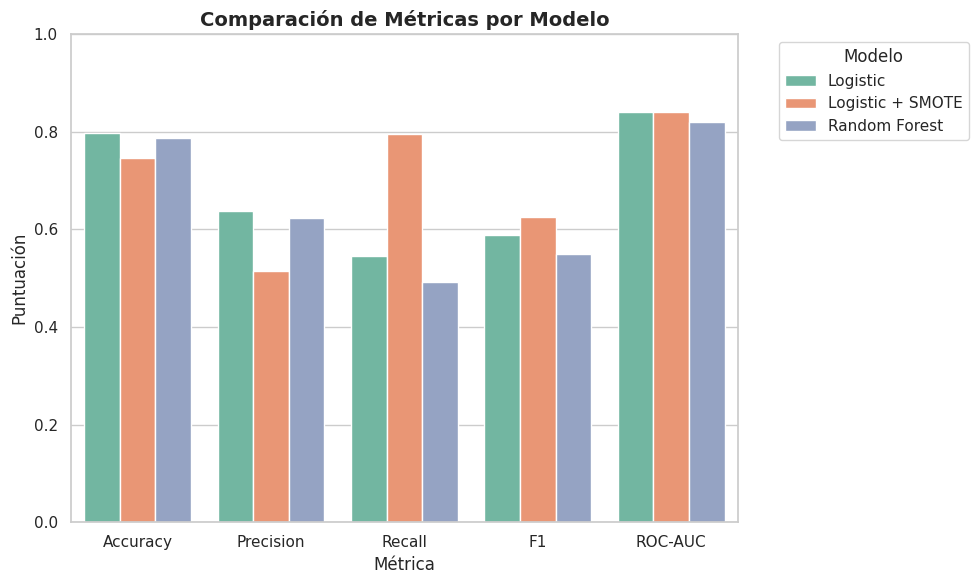

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ordenamos los resultados por ROC-AUC
df_resultados = df_resultados.sort_values("ROC-AUC", ascending=False)

# Estilo visual
sns.set(style="whitegrid")

# Reestructurar datos para graficar
df_melted = df_resultados.melt(
    id_vars="Modelo",
    value_vars=["Accuracy", "Precision", "Recall", "F1", "ROC-AUC"],
    var_name="Métrica",
    value_name="Valor"
)

# Crear la figura
plt.figure(figsize=(10, 6))


sns.barplot(data=df_melted, x="Métrica", y="Valor", hue="Modelo", palette="Set2")

# Personalizar el gráfico
plt.title("Comparación de Métricas por Modelo", fontsize=14, weight='bold')
plt.ylabel("Puntuación")
plt.xlabel("Métrica")
plt.ylim(0, 1)
plt.legend(title="Modelo", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


Curvas ROC comparativas

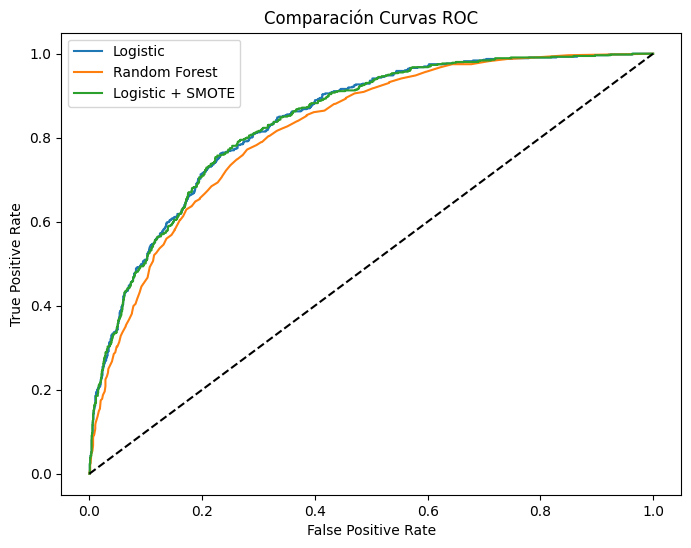

In [16]:
from sklearn.metrics import roc_curve

plt.figure(figsize=(8,6))

fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
plt.plot(fpr_log, tpr_log, label="Logistic")

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
plt.plot(fpr_rf, tpr_rf, label="Random Forest")

fpr_sm, tpr_sm, _ = roc_curve(y_test, y_proba_log_smote)
plt.plot(fpr_sm, tpr_sm, label="Logistic + SMOTE")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Comparación Curvas ROC")
plt.legend()
plt.show()

GridSearch Random Forest

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [None, 10, 20]
}

grid_search = GridSearchCV(
    pipeline_rf,
    param_grid,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Mejores parámetros:", grid_search.best_params_)
print("Mejor ROC-AUC:", grid_search.best_score_)

Mejores parámetros: {'model__max_depth': 10, 'model__n_estimators': 100}
Mejor ROC-AUC: 0.8423150662200392


Importancia de Variables (Random Forest)

In [18]:
best_rf = grid_search.best_estimator_

importances = best_rf.named_steps["model"].feature_importances_

feature_names = (
    numeric_cols.tolist() +
    list(best_rf.named_steps["preprocessor"]
         .named_transformers_["cat"]
         .get_feature_names_out(categorical_cols))
)

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values("Importance", ascending=False)

importance_df.head(10)

,Feature,Importance
1,tenure,0.182474
3,Charges_Total,0.174176
2,Charges_Monthly,0.120257
10,InternetService_Fiber optic,0.060716
25,Contract_Two year,0.054643
28,PaymentMethod_Electronic check,0.052393
24,Contract_One year,0.037326
13,OnlineSecurity_Yes,0.033813
19,TechSupport_Yes,0.029369
26,PaperlessBilling_Yes,0.023448


Guardar Modelo Final

In [19]:
import joblib

joblib.dump(best_rf, "modelo_final_churn.pkl")

['modelo_final_churn.pkl']

Interpretabilidad avanzada con SHAP

SHAP te permite explicar por qué el modelo predice churn.

In [20]:
!pip install shap

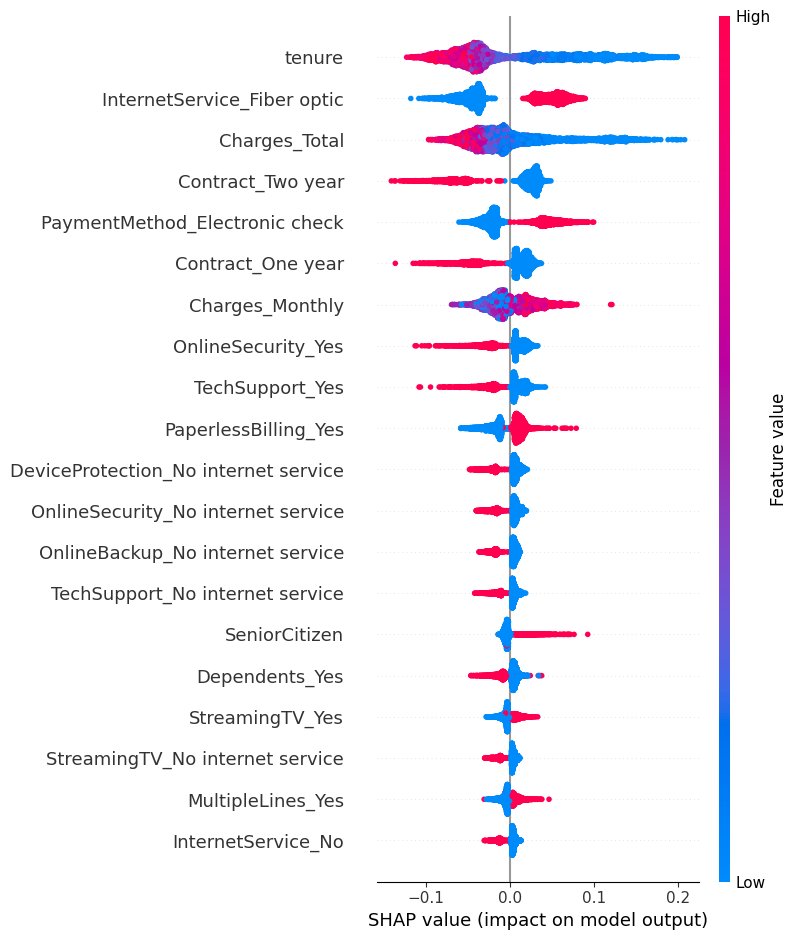

In [21]:
import shap

# Usamos el mejor modelo
best_rf = grid_search.best_estimator_

# Transformar datos de entrenamiento
X_train_processed = best_rf.named_steps["preprocessor"].transform(X_train)

# Crear explainer
explainer = shap.TreeExplainer(best_rf.named_steps["model"])

shap_values = explainer.shap_values(X_train_processed)

# Obtener nombres de variables
feature_names = (
    numeric_cols.tolist() +
    list(best_rf.named_steps["preprocessor"]
         .named_transformers_["cat"]
         .get_feature_names_out(categorical_cols))
)

# Gráfico global
# Assuming binary classification where shap_values is a 3D array (n_samples, n_features, n_classes)
# and class 1 is the positive class for churn.
shap.summary_plot(shap_values[:, :, 1], X_train_processed, feature_names=feature_names)

📊 Informe

 Predicción de Cancelación de Clientes

🎯 Objetivo

Desarrollar modelos predictivos para identificar clientes con alta probabilidad de cancelar el servicio (churn) y proponer estrategias de retención.

🔎 Hallazgos Principales

Los factores con mayor influencia en la cancelación fueron:

Contratos mensuales (mayor riesgo)

Bajo tiempo de permanencia (tenure bajo)

Altos cargos mensuales

Método de pago electrónico

Ausencia de servicios adicionales (seguridad online, soporte técnico)

🤖 Modelos Evaluados

Se compararon:

Regresión Logística

Random Forest

Logistic Regression con SMOTE

Random Forest optimizado (GridSearch)

El mejor desempeño general lo obtuvo Random Forest optimizado, con mayor ROC-AUC y mejor recall en la clase churn.

📈 Impacto del Balanceo (SMOTE)

El uso de SMOTE mejoró significativamente el recall de la clase minoritaria (clientes que cancelan), permitiendo detectar más casos de riesgo.

💼 Estrategias de Retención Recomendadas

Incentivar contratos anuales con descuentos progresivos.

Campañas de fidelización durante los primeros 6 meses.

Ofertas especiales para clientes con alto gasto mensual.

Programas de retención automática cuando el modelo detecte alto riesgo.

🚀 Beneficio para el Negocio

Implementando este modelo se puede:

Reducir tasa de cancelación

Aumentar lifetime value

Optimizar campañas de retención

Focalizar recursos en clientes de alto riesgo